In [ ]:
# import numpy as np
# import tensorflow as tf
# import matplotlib.pyplot as plt
# import keras

# X = np.array([])
# Y = np.array([])

# for i in range(1000):
#   X = np.append(X, i)
#   Y = np.append(Y, i*2.85555555555+32.3)

# l0 =tf.keras.layers.Dense(units =1, input_shape = [1])
# model  = tf.keras.Sequential([l0])
# model.compile(loss = 'mean_squared_error', optimizer = tf.keras.optimizers.Adam(0.1))

# history = model.fit(X,Y, epochs =1000, verbose = False)
# print(l0.get_weights())

import tensorflow as tf

tf.test.is_built_with_cuda()


True

# Подготовка данных

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AH7piBY03eY8nNUUHA5FQ15DuYH660UYlrtcO5jDb2V7kpgT06BY0A
Mounted at /content/drive


# Импортируем библиотеки

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt


Подготавливаем данные

In [ ]:
max_words = 10000

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words= max_words)
word_index = imdb.get_word_index()


1646592/1641221 [==============================] - 0s 0us/step


In [ ]:
maxlen =200
x_train = pad_sequences(x_train, maxlen=maxlen, padding = 'post')
x_test  = pad_sequences(x_test, maxlen=maxlen, padding = 'post')

In [ ]:
x_train[0]

array([   5,   25,  100,   43,  838,  112,   50,  670,    2,    9,   35,
        480,  284,    5,  150,    4,  172,  112,  167,    2,  336,  385,
         39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,    4,
        192,   50,   16,    6,  147, 2025,   19,   14,   22,    4, 1920,
       4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,   38,
         76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,   16,
        626,   18,    2,    5,   62,  386,   12,    8,  316,    8,  106,
          5,    4, 2223, 5244,   16,  480,   66, 3785,   33,    4,  130,
         12,   16,   38,  619,    5,   25,  124,   51,   36,  135,   48,
         25, 1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,
         14,  407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,
        256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,
        476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,
         88,    4,  381,   15,  297,   98,   32, 20

Создаем модель

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 2, input_length=maxlen))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=15, batch_size=128, validation_split=0.1)

Epoch 1/15
176/176 [==============================] - 1s 5ms/step - loss: 0.6914 - accuracy: 0.5275 - val_loss: 0.6852 - val_accuracy: 0.5964
Epoch 2/15
176/176 [==============================] - 1s 4ms/step - loss: 0.6296 - accuracy: 0.7168 - val_loss: 0.5474 - val_accuracy: 0.7792
Epoch 3/15
176/176 [==============================] - 1s 4ms/step - loss: 0.4567 - accuracy: 0.8234 - val_loss: 0.4022 - val_accuracy: 0.8484
Epoch 4/15
176/176 [==============================] - 1s 4ms/step - loss: 0.3492 - accuracy: 0.8690 - val_loss: 0.3458 - val_accuracy: 0.8572
Epoch 5/15
176/176 [==============================] - 1s 4ms/step - loss: 0.2982 - accuracy: 0.8862 - val_loss: 0.3187 - val_accuracy: 0.8732
Epoch 6/15
176/176 [==============================] - 1s 4ms/step - loss: 0.2640 - accuracy: 0.9012 - val_loss: 0.3049 - val_accuracy: 0.8752
Epoch 7/15
176/176 [==============================] - 1s 4ms/step - loss: 0.2431 - accuracy: 0.9085 - val_loss: 0.2988 - val_accuracy: 0.8772
Epoch 

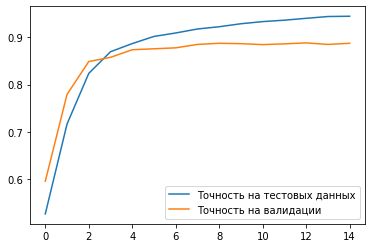

In [ ]:
plt.plot(history.history['accuracy'], label = 'Точность на тестовых данных')
plt.plot(history.history['val_accuracy'], label = 'Точность на валидации')
plt.legend()
plt.show()

Точность на тестовых данных

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)


782/782 [==============================] - 1s 2ms/step - loss: 0.3048 - accuracy: 0.8726


In [ ]:
embedding_matrix = model.layers[0].get_weights()[0]

In [ ]:
embedding_matrix

array([[-0.02234442, -0.01961089],
       [-0.09836467,  0.15034214],
       [-0.00971579,  0.04246315],
       ...,
       [ 0.20544414, -0.00718773],
       [-0.10997351,  0.16038756],
       [ 0.13566676, -0.19875583]], dtype=float32)

In [ ]:
word_i = dict()
for word, number in word_index.items():
  word_i[word] =number+3
word_i['<Заполнитель>']=0
word_i['<Начало последовательности>']=1
word_i['<Неизвестное слово>']=2
word_i['<Не используется>']=3



In [ ]:
word = 'bad'
word_number= word_i[word]
print('Номер слова:', word_number)
print('Вектор для слова:', embedding_matrix[word_number])

Номер слова: 78
Вектор для слова: [-0.44122118  0.47854438]


In [ ]:
reverse_word_index = dict()
for key, value in word_i.items():
  reverse_word_index[value]=key

In [ ]:
filename = 'word_vec.csv'

In [ ]:
with open(filename, 'w') as f:
  for word_num in range(max_words):
    word=reverse_word_index[word_num]
    vec=embedding_matrix[word_num]
    f.write(word+',')
    f.write(','.join([str(x) for x in vec ])+'\n')


In [ ]:
!head -n 20 $filename

<Заполнитель>,-0.022344422,-0.019610895
<Начало последовательности>,-0.09836467,0.15034214
<Неизвестное слово>,-0.00971579,0.042463154
<Не используется>,0.046307277,0.007912457
the,0.026299624,-0.013843813
and,0.032023236,-0.07817973
a,0.008600413,0.0096460935
of,0.00083110377,0.03143151
to,-0.012192307,-0.0003634245
is,0.04268571,-0.030352322
br,0.015085416,0.05109066
in,0.07507412,0.04886918
it,0.05765266,-0.06532868
i,0.00842808,-0.012874222
this,0.016932802,0.044004556
that,-0.015341766,-0.011750978
was,0.028710917,0.08952224
as,0.02690627,-0.007429045
for,-0.056282505,-0.023144525
with,0.02420667,0.0006163776


In [ ]:
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

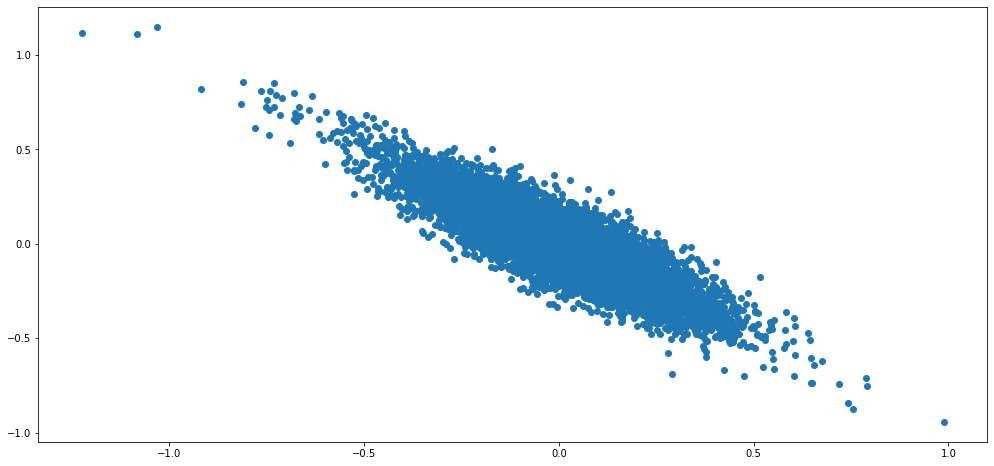

In [ ]:
plt.figure  (figsize=(17,8))
plt.subplot(1,1,1)
plt.scatter(embedding_matrix[:,0],embedding_matrix[:,1])

In [ ]:
review = ['low','poor','ill','nasty',
          'excellent','wonderful','great','good','splendid','cool','class']
enc_review = []
for word in review:
  enc_review.append(word_i[word])
enc_review

[364, 338, 1815, 1606, 321, 389, 87, 52, 3620, 646, 707]

In [ ]:
review_vectors = embedding_matrix[enc_review]
review_vectors

array([[-0.16222477,  0.26088873],
       [-0.5654777 ,  0.69199693],
       [-0.34801197,  0.3669497 ],
       [-0.05998825,  0.13995177],
       [ 0.74124616, -0.8410569 ],
       [ 0.5515972 , -0.66253513],
       [ 0.40118733, -0.49621943],
       [ 0.21543716, -0.12949598],
       [ 0.16157885, -0.24481797],
       [ 0.21675947, -0.22316955],
       [ 0.04371051,  0.02183819]], dtype=float32)

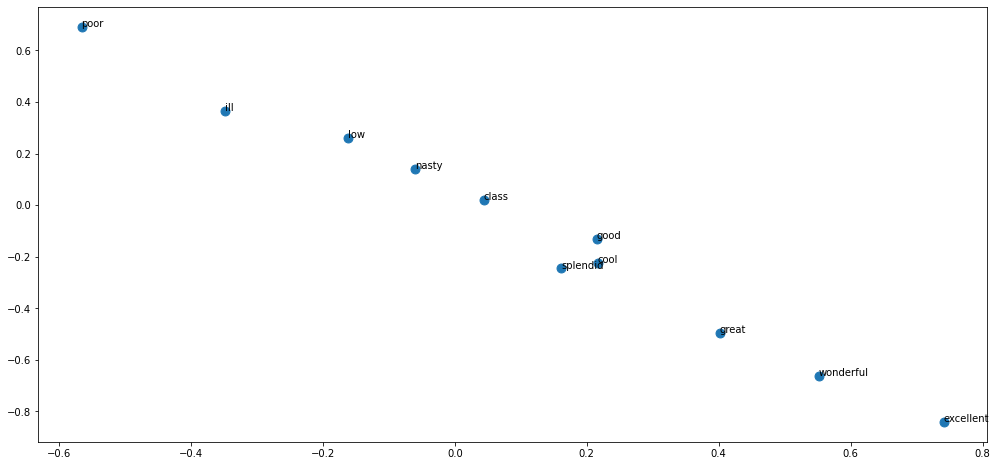

In [ ]:
plt.figure  (figsize=(17,8))

plt.subplot(1,1,1)
plt.scatter(review_vectors[:,0],review_vectors[0:,1], s = 80)
for i, txt in enumerate(review):
  plt.annotate(txt, (review_vectors[i,0],review_vectors[i,1]))